Elizabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [2]:
datafile = '/u/ki/swmclau2/Git/HODEmulator/data/xi_gg_z0.0'
prediction = np.loadtxt(datafile) #r, xi_gg, xi_gg_1h
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'chinchilla_tests_300p/'
predictions = {}
predictions['default'] = np.loadtxt(datadir+'halo_model_default.txt')

In [3]:
a = 1.0

rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2

In [4]:
#Chinchilla
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'chinchilla'
#boxsize_npart = [(125.0, 1024),(125.0, 2048), (250.0, 1024), (250.0, 128), (250.0, 196), (250.0, 2048),
#                (250.0, 2560), (250.0, 320), (250.0, 512), (250.0, 768), (250.0, 85), (400.0, 1024),
#                (400.0, 136), (400.0, 2048), (400.0, 210), (400.0, 315), (400.0, 512), (400.0, 768)]
boxsize_npart = [(125.0, 1024),(125.0, 2048),(250.0, 2048),
                (250.0, 2560), (250.0, 512), (250.0, 768), (400.0, 1024),
                (400.0, 2048), (400.0, 768)]

ch_data = defaultdict(list)
version_names = []

for boxsize, npart in boxsize_npart:
#for sim in simnames:
    vn = 'Lb%d-%d'%(int(boxsize),npart )
    version_names.append(vn)
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_all_%.3f_default.npy'%(sim,vn,a)) )
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_1h_%.3f_default.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_2h_%.3f.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/wp_all_%.3f.npy'%(sim,vn,a)) )

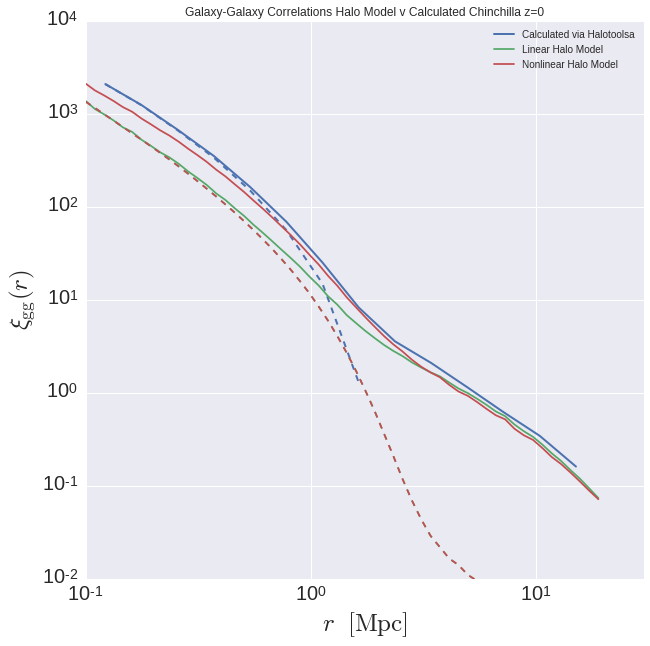

In [5]:
fig = plt.figure(figsize = (10,10))
version_names = ['Lb250-2560']
for vn, color in zip(version_names, colors):
#for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, ch_data[vn][0], lw = 2,
             label='Calculated via Halotoolsa', color=color)
             #label = sim, color = color)
    plt.plot(rbin_centers, ch_data[vn][1], ls = '--', lw = 2, color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Linear Halo Model', color = c)
plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)
c = next(colors)
plt.plot(predictions['default'][:, 0], predictions['default'][:, 1],  label = 'Nonlinear Halo Model', color = c)
plt.plot(predictions['default'][:, 0], predictions['default'][:, 2], ls = '--', color = c)
    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated Chinchilla z=0')
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [6]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#simnames = ['fox']
simnames = ['multidark_highres', 'multidark', 'bolshoi', 'fox', 'emu']
#scale_factors = [0.25,0.333,0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
sf = {sim: a for sim in simnames}
sf['multidark_highres'] = 1.001
data = defaultdict(list)

#for sf in scale_factors:
for sim in simnames:
    data[sim].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf[sim])) )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

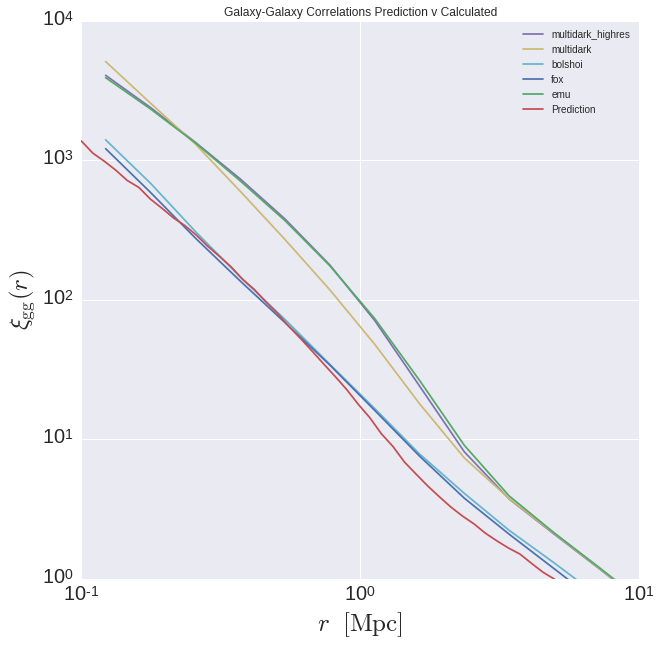

In [7]:
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, data[sim][0], alpha = 1,
             label = sim, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Prediction', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
plt.title('Galaxy-Galaxy Correlations Prediction v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [8]:
%%bash
ls ~/des/HODOutput/chinchilla_tests/*

/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_default.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_highMinMass.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_highMinMassMMax.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_step_1.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_step_2.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_highMinMass.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_stepFunc.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_highMinMass.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_stepFunc.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_default_250_2048.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_defau

In [9]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'chinchilla_tests/'
sim = 'chinchilla'
a = 1.0
data = {}

data['highMinMass'] = np.loadtxt(datadir+'xi_all_%.3f_highMinMass_400_2048.npy'%a)
data['stepFunc'] = np.loadtxt(datadir+'xi_all_%.3f_stepFunc_400_2048.npy'%a)
data['default'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_%.3f_default_400_2048.npy'%a)

[]

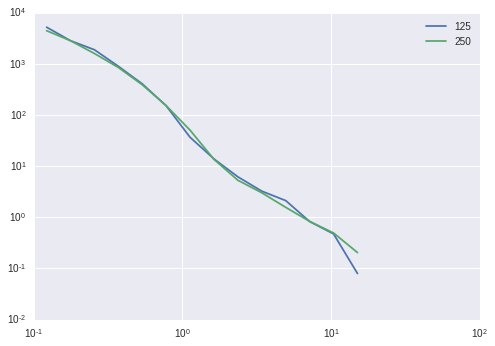

In [10]:
h125 = np.loadtxt(datadir+'xi_all_%.3f_highMinMass_125_2048.npy'%a)
h250 = np.loadtxt(datadir+'xi_all_%.3f_highMinMass_250_2048.npy'%a)
plt.plot(rbin_centers, h125, label = '125')
plt.plot(rbin_centers, h250, label = '250')
plt.legend(loc = 'best')
plt.loglog()

In [11]:
predictions = {}
predictions['highMinMass'] = np.loadtxt(datadir+'halo_model_highMinMassMMax.txt')
predictions['stepFunc'] = np.loadtxt(datadir+'halo_model_step_2.txt')
predictions['default'] = np.loadtxt(datadir+'halo_model_default.txt')

In [12]:
np.interp(predictions['default'][:,0], rbin_centers, data['default'])

array([  2.16204557e+03,   2.16204557e+03,   2.16204557e+03,
         1.97666271e+03,   1.74625512e+03,   1.49280677e+03,
         1.21401358e+03,   1.08866027e+03,   9.51266288e+02,
         8.00133044e+02,   6.46120561e+02,   5.75739159e+02,
         4.98320023e+02,   4.13158729e+02,   3.33041197e+02,
         2.91985423e+02,   2.46824073e+02,   1.97146641e+02,
         1.54922508e+02,   1.32738191e+02,   1.08335451e+02,
         8.14924401e+01,   6.18462859e+01,   5.20777490e+01,
         4.13323428e+01,   2.95123611e+01,   2.22730830e+01,
         1.86141912e+01,   1.45893825e+01,   1.01620930e+01,
         7.97864938e+00,   6.77646194e+00,   5.45405161e+00,
         3.99940990e+00,   3.41170579e+00,   3.00033616e+00,
         2.54783071e+00,   2.05007374e+00,   1.83991451e+00,
         1.63291894e+00,   1.40522403e+00,   1.16219450e+00,
         1.03329058e+00,   8.91496316e-01,   7.35522547e-01,
         5.84530091e-01,   5.23343263e-01,   4.56037709e-01,
         3.82001735e-01,

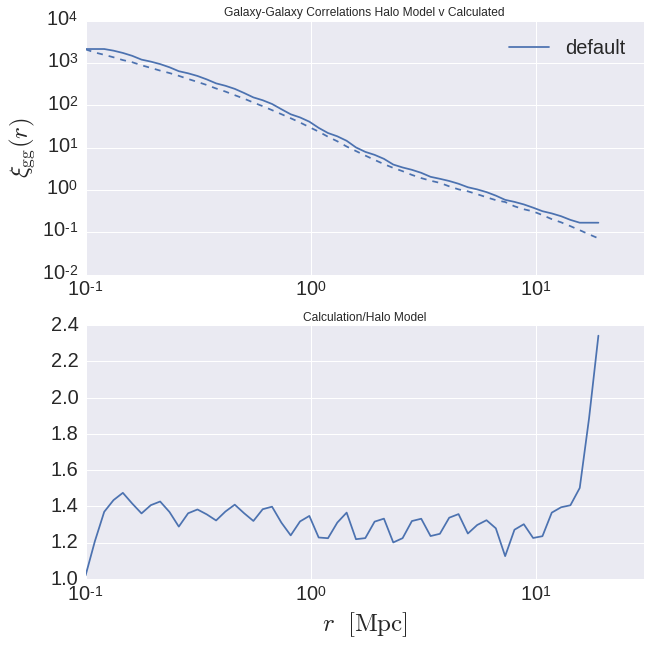

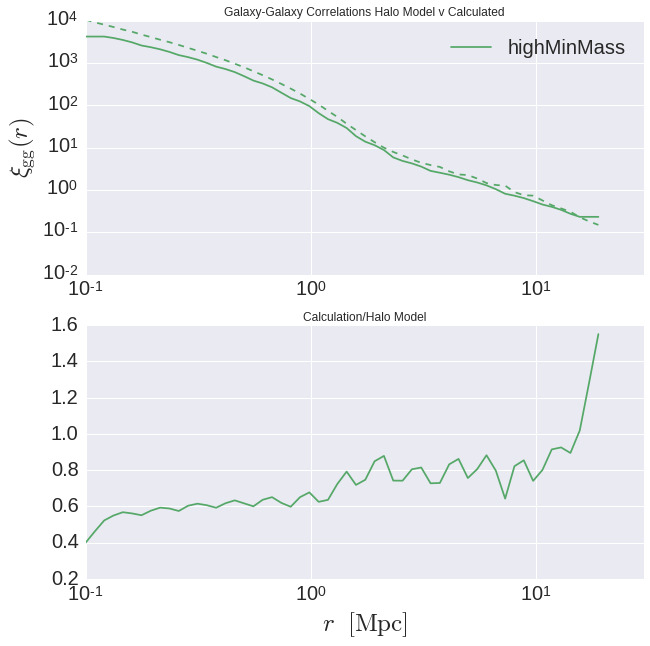

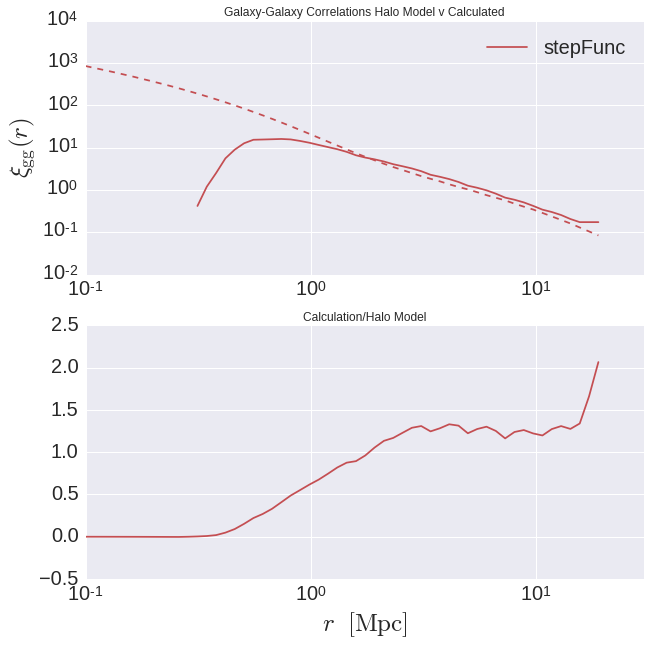

In [13]:
colors = sns.color_palette()
#fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for (label, xi_all), color in zip(data.iteritems(), colors):
    fig = plt.figure(figsize = (10,10))
    interp = np.interp(predictions[label][:,0], rbin_centers, data[label])

    plt.subplot(211)
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    #plt.plot(rbin_centers, xi_all, alpha = 1,
    #         label = label, color = color)
    plt.plot(predictions[label][:, 0], interp, label = label, color = color)
    plt.plot(predictions[label][:, 0], predictions[label][:, 1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
#c = colors[len(data)]
#plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Halo Model', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)
    
    plt.subplot(212)
    plt.title('Calculation/Halo Model')
    interp = np.interp(predictions[label][:,0], rbin_centers, data[label])
    plt.plot(predictions[label][:,0], interp/predictions[label][:,1], color = color)
    
    plt.xlim(xmin = 0.1, xmax = 30)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    #plt.legend(loc='best', fontsize=20)
    

    plt.show()

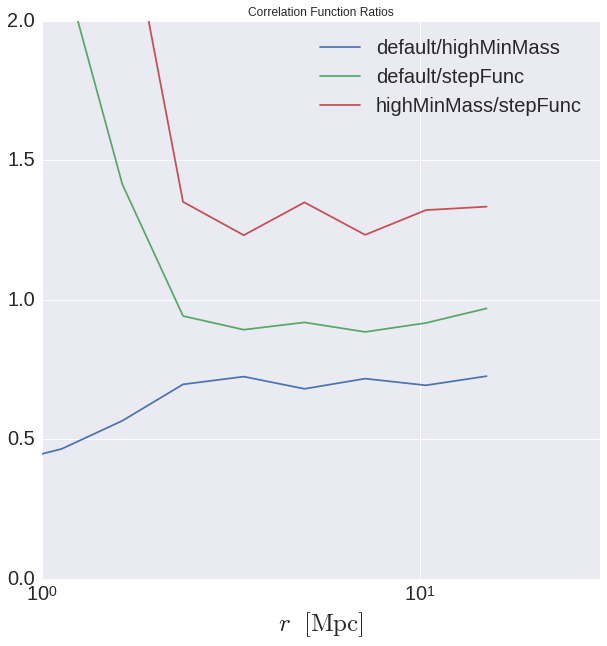

In [14]:
colors = sns.color_palette()
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
labels = ['default', 'highMinMass', 'stepFunc']
for i, (label1, color) in enumerate(zip(labels, colors)):
    for label2 in labels[i+1:]:
        plt.plot(rbin_centers, data[label1]/data[label2], label = '%s/%s'%(label1, label2))
       
plt.title('Correlation Function Ratios')
plt.xlim(xmin = 1, xmax = 30)
plt.ylim(ymin = 0, ymax = 2)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()

In [15]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#datadir = outputdir+'chinchilla_tests/'
sim = 'chinchilla'
a = 1.0
data = {}

data['gal_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_gal_%.3f_h.npy'%a)

data['subHalo_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_halo_%.3f_h_sh.npy'%a)
data['noSubHalo_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_halo_%.3f_h_nosh.npy'%a)

In [16]:
predictions = {}
predictions['linear'] = np.loadtxt(outputdir+'chinchilla_tests_300p/halo_model_step_1.txt')
predictions['nonlinear'] = np.loadtxt(outputdir+'chinchilla_tests_300p/halo_model_step_2.txt')

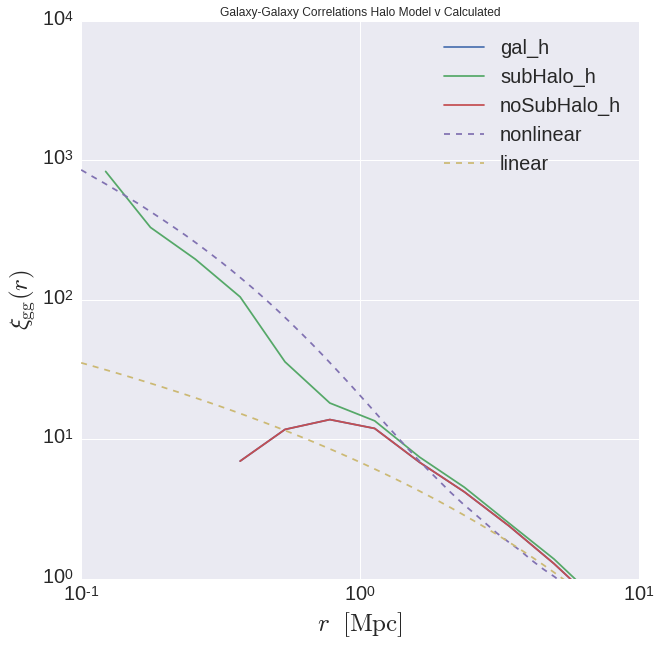

In [17]:
colors = sns.color_palette()
fig = plt.figure(figsize = (10,10))
for (label, xi_all), color in zip(data.iteritems(), colors):
    rz = 1.0/a -1 
    plt.plot(rbin_centers, xi_all, 
             label = label, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)

for (label, xi_all), color in zip(predictions.iteritems(), colors[len(data):]):
    plt.plot(predictions[label][:, 0], predictions[label][:, 1], ls = '--', color = color, label = label)
    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()